In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
print("Customers Dataset:")
print(customers.head())
print(customers.info())

print("\nProducts Dataset:")
print(products.head())
print(products.info())

print("\nTransactions Dataset:")
print(transactions.head())
print(transactions.info())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving 

In [ ]:
# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print("Customers:\n", customers.describe(include='all'))
print("Products:\n", products.describe(include='all'))
print("Transactions:\n", transactions.describe())


Summary Statistics:
Customers:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN               

In [ ]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print("\nMerged Data Preview:")
print(merged_data.head())


Merged Data Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLi

# **EDA and Visualization**

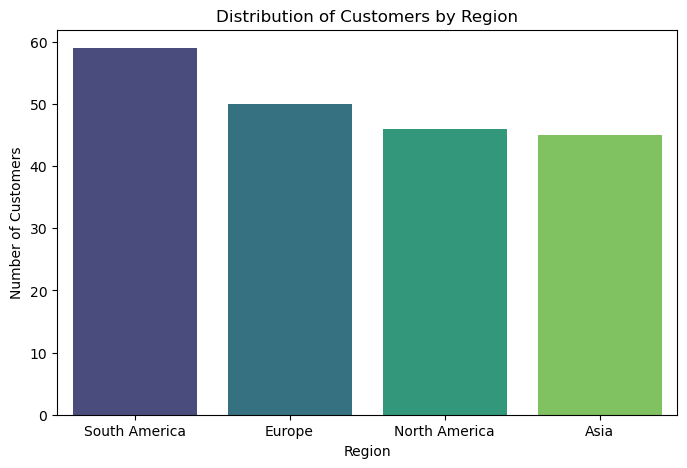

In [ ]:
#  Distribution of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

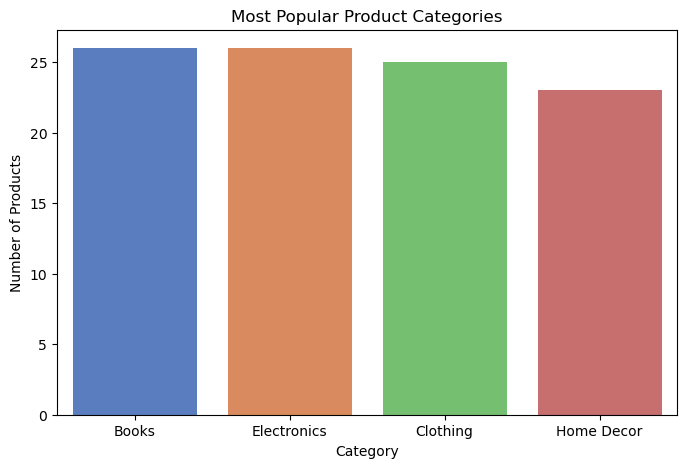

In [ ]:
#  Most popular product categories
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='muted')
plt.title('Most Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

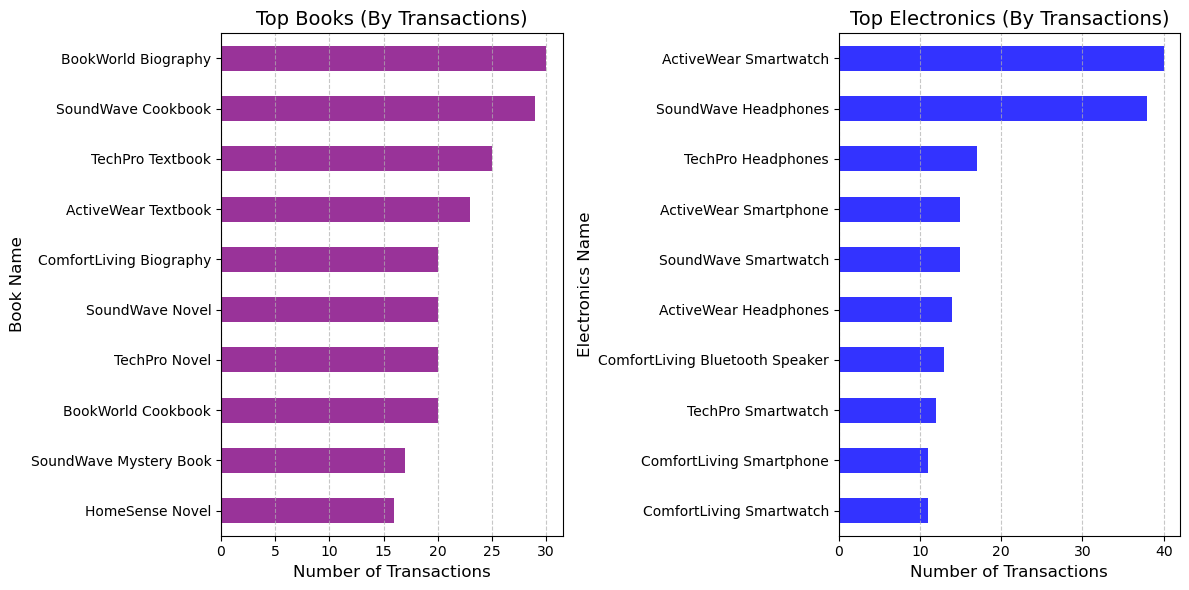

In [ ]:
# Filter data for 'Books' and 'Electronics' categories
books_data = merged_data[merged_data['Category'] == 'Books']
electronics_data = merged_data[merged_data['Category'] == 'Electronics']

# Count the number of transactions for each product in 'Books'
top_books = books_data['ProductName'].value_counts().head(10)

# Count the number of transactions for each product in 'Electronics'
top_electronics = electronics_data['ProductName'].value_counts().head(10)

# Plotting the top books
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_books.plot(kind='barh', color='purple', alpha=0.8)
plt.title('Top Books (By Transactions)', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Book Name', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Plotting the top electronics
plt.subplot(1, 2, 2)
top_electronics.plot(kind='barh', color='blue', alpha=0.8)
plt.title('Top Electronics (By Transactions)', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Electronics Name', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


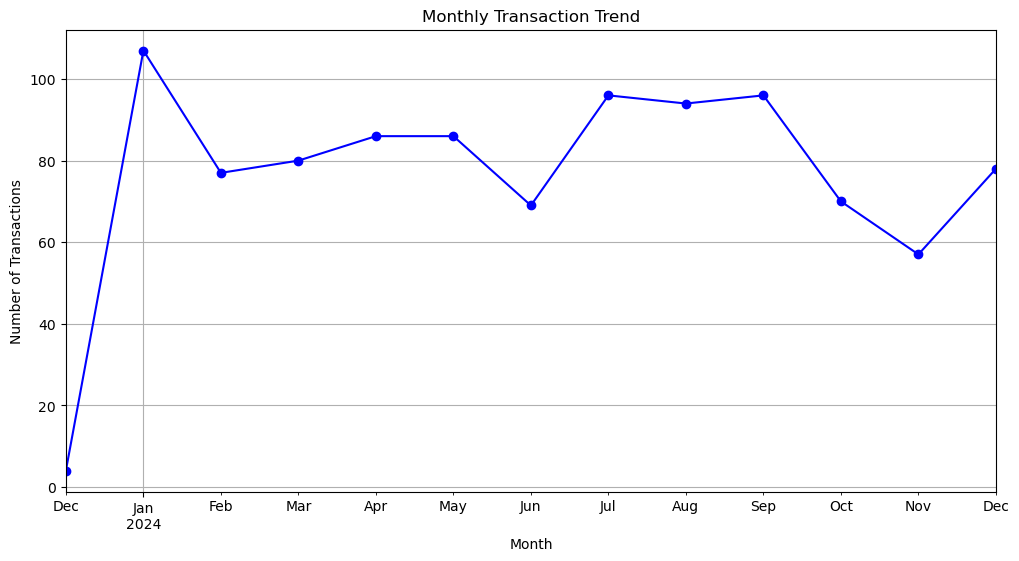

In [ ]:
#  Monthly transaction trend
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_trend = merged_data.groupby('Month').size()
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='b')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

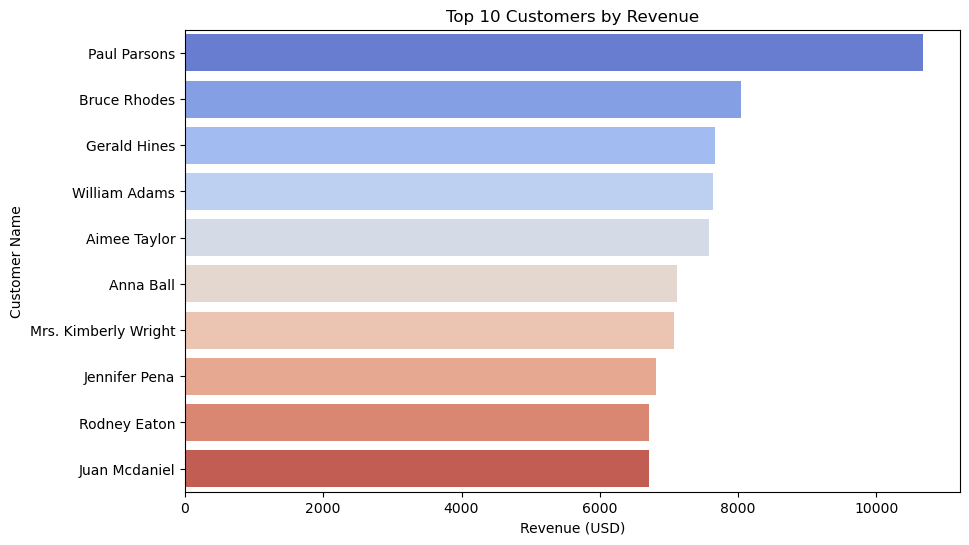

In [ ]:
#  Top 10 customers by revenue
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Customer Name')
plt.show()

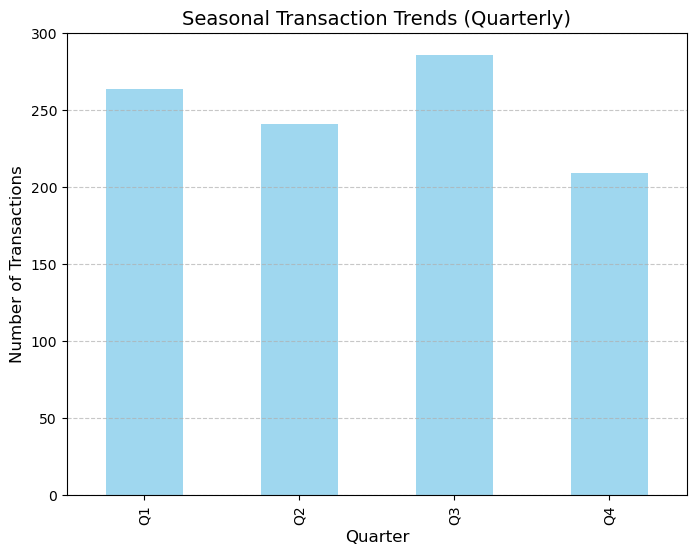

In [ ]:

# Converting TransactionDate to datetime format and extracting the quarter
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Quarter'] = transactions['TransactionDate'].dt.quarter

# Grouping data by quarter and counting transactions
quarterly_trends = transactions.groupby('Quarter').size()

# Visualizing the transaction trends
plt.figure(figsize=(8, 6))
quarterly_trends.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Seasonal Transaction Trends (Quarterly)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Quarter', 'ProductName',
       'Category', 'Price_y'],
      dtype='object')


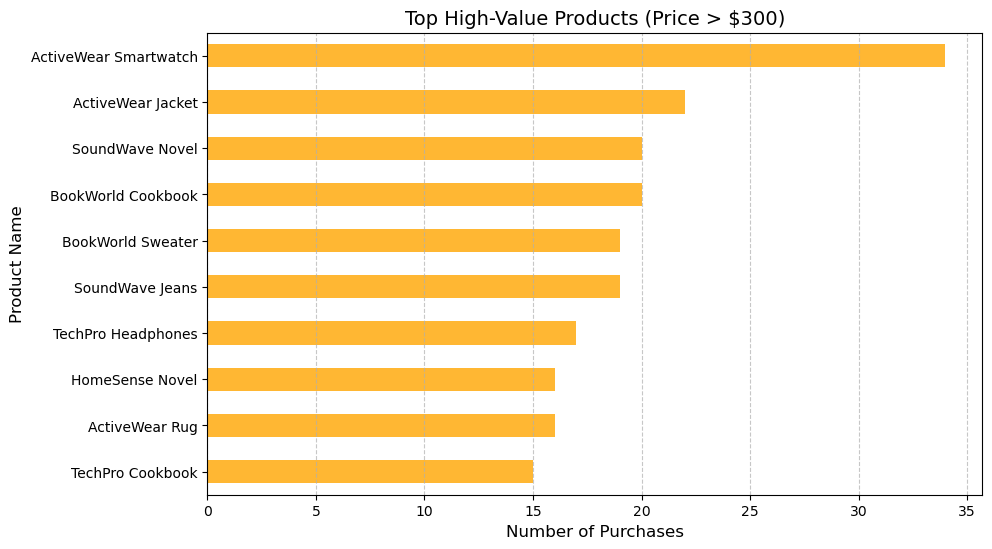

In [ ]:
# Merging transactions with products to get product prices
merged_data = transactions.merge(products, on='ProductID')

# Filtering products priced above $300
high_value_products = merged_data[merged_data['Price_y'] > 300]

# Grouping by ProductName to find the most purchased high-value products
top_high_value_products = high_value_products['ProductName'].value_counts().head(10)

# Visualizing top high-value products
plt.figure(figsize=(10, 6))
top_high_value_products.plot(kind='barh', color='orange', alpha=0.8)
plt.title('Top High-Value Products (Price > $300)', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


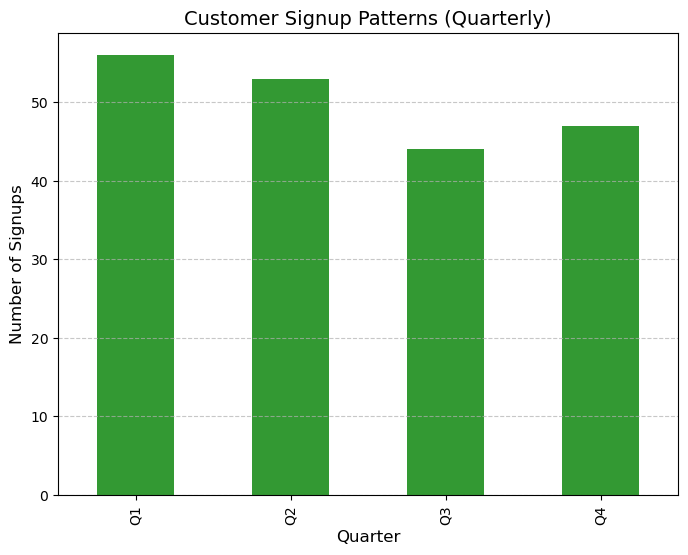

In [ ]:
# Converting SignupDate to datetime format and extracting the quarter
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Quarter'] = customers['SignupDate'].dt.quarter

# Grouping data by quarter and counting customer signups
quarterly_signups = customers.groupby('Quarter').size()

# Visualizing the signup trends
plt.figure(figsize=(8, 6))
quarterly_signups.plot(kind='bar', color='green', alpha=0.8)
plt.title('Customer Signup Patterns (Quarterly)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


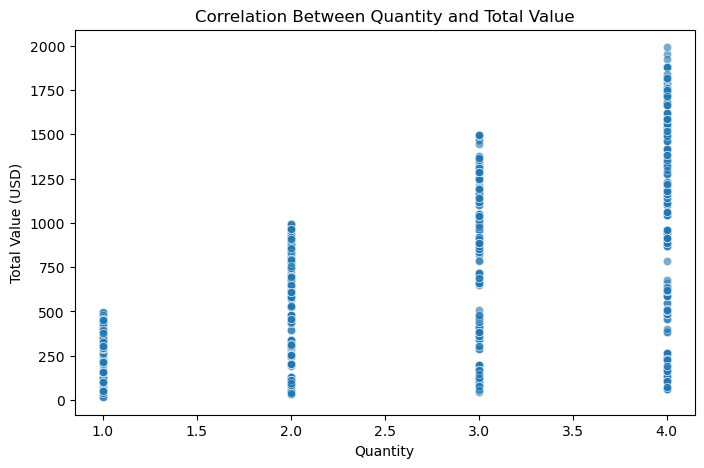

In [ ]:
# Correlation between quantity and total value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Quantity', y='TotalValue', alpha=0.6)
plt.title('Correlation Between Quantity and Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value (USD)')
plt.show()